<font style="font-size:28px;" align="left"><b> Quantum Teleportation of Bitcoin Keys </b></font>
<br>

On the Bitcoin blockcahin, sometimes the transactions fees (measured in sats/vb) are high. And as Bitcoin is capped at 21,000,000 coins, transaction fees will skyrocket from greater competition between miners and from greater utility of the protocol by more people (users today are only about a hundred million).

Eventually, it will be prudent to sometimes send not bitcoins, but the keys to bitcoins. Sending a public key helps with _Proof of Reserves_ while sending a private key helps with _Creation of Trust_ (you trust the sender will not change their mind and spend the coins themsleves. Sender could be your Parents, Spouse, etc).

So here, we shall see that quantum secure direct communication (QSDC) protocols like the "Quantum Teleportation protocol" we shall discuss today, will come in handy.

Quantum Teleportation prevents the ability of an attacker to make a copy of the message being sent using the <b>no-cloning</b> theorem of quantum mechanics. It's vulnerability however is the need for a secure classical channel to communicate  the measurement bases to be used.

Today we shall design and implement the protocol for sending a <u>Bitcoin Segwit public key</u> (TLDR; Segwit is the latest secure format because the public key is a hash, so the real/legacy public key is masked. This provides some extra security against encrytion attacks, classical and quantum alike). 

Another time, we shall analyse the security implications vs encrypted classical communication channels vs other QSDC protocols.

In [1]:
#This is the BTC Segwit public key we shall use. It has 42 characters
'''public_key = bc1qar0srrr7xfkvy5l643lydnw9re59gtzzwf5mdq'''

In [2]:
#Use https://www.rapidtables.com/convert/number/hex-to-ascii.html to convert the above ASCII text to ASCII binary
string = "01100010 01100011 00110001 01110001 01100001 01110010 00110000 01110011 01110010 01110010 01110010 00110111 01111000 01100110 01101011 01110110 01111001 00110101 01101100 00110110 00110100 00110011 01101100 01111001 01100100 01101110 01110111 00111001 01110010 01100101 00110101 00111001 01100111 01110100 01111010 01111010 01110111 01100110 00110101 01101101 01100100 01110001"

binary_public_key_list = list(string)
print(binary_public_key_list)

['0', '1', '1', '0', '0', '0', '1', '0', ' ', '0', '1', '1', '0', '0', '0', '1', '1', ' ', '0', '0', '1', '1', '0', '0', '0', '1', ' ', '0', '1', '1', '1', '0', '0', '0', '1', ' ', '0', '1', '1', '0', '0', '0', '0', '1', ' ', '0', '1', '1', '1', '0', '0', '1', '0', ' ', '0', '0', '1', '1', '0', '0', '0', '0', ' ', '0', '1', '1', '1', '0', '0', '1', '1', ' ', '0', '1', '1', '1', '0', '0', '1', '0', ' ', '0', '1', '1', '1', '0', '0', '1', '0', ' ', '0', '1', '1', '1', '0', '0', '1', '0', ' ', '0', '0', '1', '1', '0', '1', '1', '1', ' ', '0', '1', '1', '1', '1', '0', '0', '0', ' ', '0', '1', '1', '0', '0', '1', '1', '0', ' ', '0', '1', '1', '0', '1', '0', '1', '1', ' ', '0', '1', '1', '1', '0', '1', '1', '0', ' ', '0', '1', '1', '1', '1', '0', '0', '1', ' ', '0', '0', '1', '1', '0', '1', '0', '1', ' ', '0', '1', '1', '0', '1', '1', '0', '0', ' ', '0', '0', '1', '1', '0', '1', '1', '0', ' ', '0', '0', '1', '1', '0', '1', '0', '0', ' ', '0', '0', '1', '1', '0', '0', '1', '1', ' ', '0', '1',

In [3]:
#remove the empty spaces from our list

dlist = []
for ele in binary_public_key_list:
    if ele.strip():
        dlist.append(ele)

print(dlist)

['0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0',

In [4]:
#Quantum Teleportation protocol ? Superdense coding protocol

'''Note; We shall actually use the "Superdense coding protocol", not qunatum teleportation.

Superdense coding uses a qubit to transfer two classical bits, 
while teleportation performs one qubit transfer using two classical bits

We want to transfer classical bits of information (our bitcoin key), not transfer a quantum state'''

#we first need a new list with our bits put into pairs. Since there are 42 * 8 = 336 bits, 

#we have an even number so we shall have 168 pairs

dlist2 = []

for i in range(0, len(dlist), 2):
    s = dlist[i] + dlist[i+1]
    dlist2.append(s)

print(len(dlist2))



168


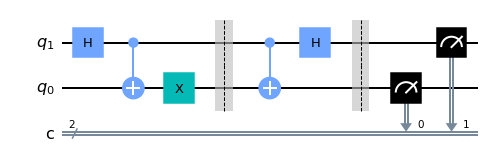

1
01 --> {'01': 10}


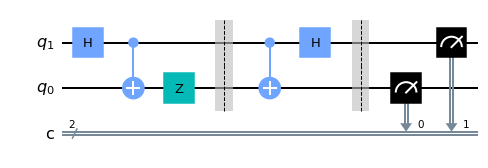

2
10 --> {'10': 10}


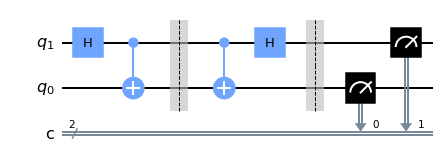

3
00 --> {'00': 10}


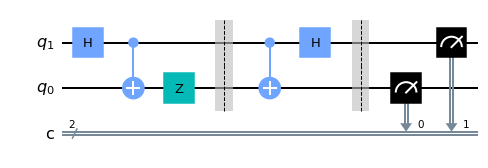

4
10 --> {'10': 10}


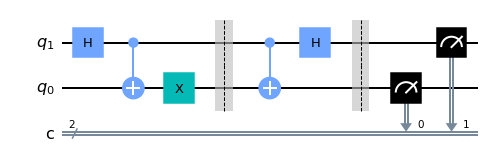

5
01 --> {'01': 10}


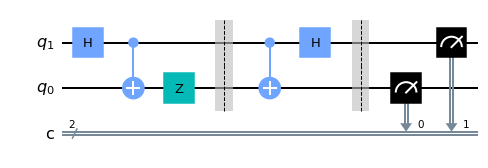

6
10 --> {'10': 10}


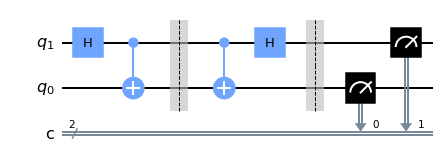

7
00 --> {'00': 10}


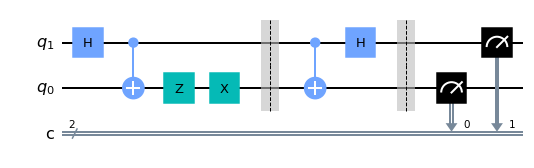

8
11 --> {'11': 10}


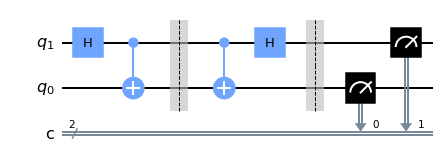

9
00 --> {'00': 10}


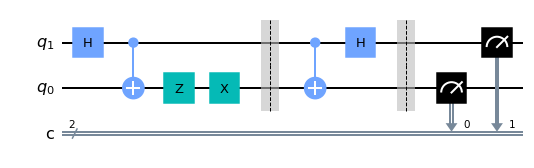

10
11 --> {'11': 10}


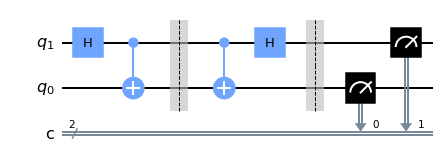

11
00 --> {'00': 10}


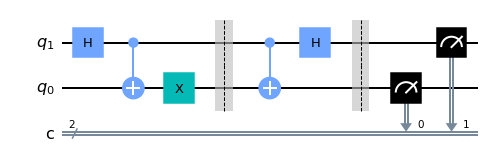

12
01 --> {'01': 10}


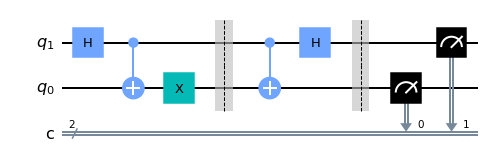

13
01 --> {'01': 10}


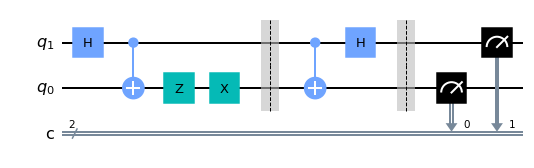

14
11 --> {'11': 10}


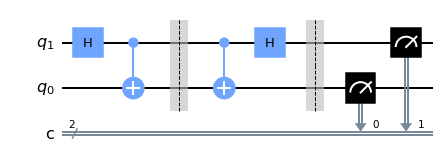

15
00 --> {'00': 10}


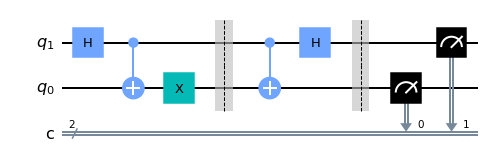

16
01 --> {'01': 10}


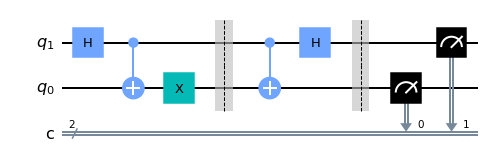

17
01 --> {'01': 10}


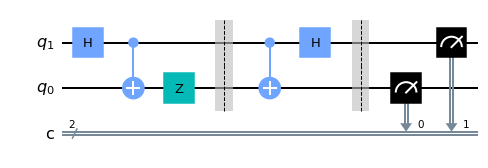

18
10 --> {'10': 10}


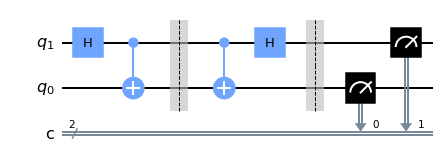

19
00 --> {'00': 10}


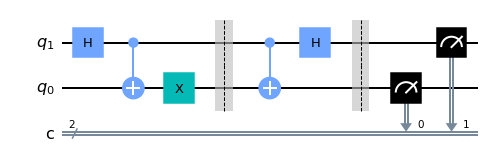

20
01 --> {'01': 10}


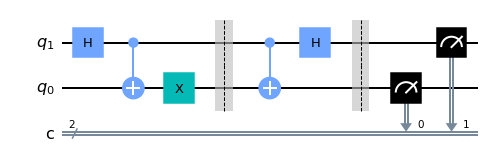

21
01 --> {'01': 10}


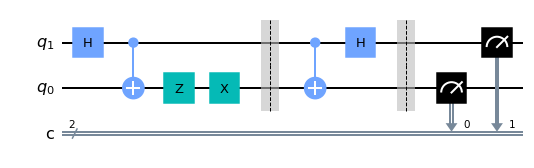

22
11 --> {'11': 10}


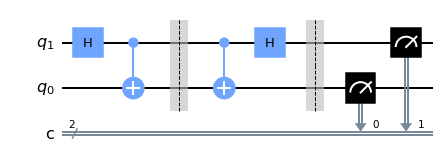

23
00 --> {'00': 10}


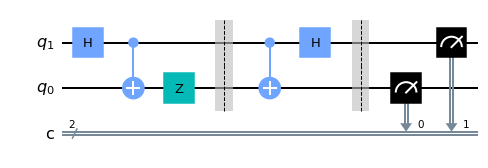

24
10 --> {'10': 10}


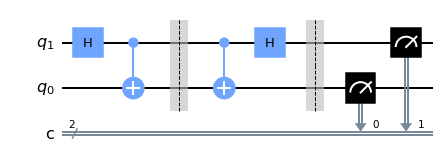

25
00 --> {'00': 10}


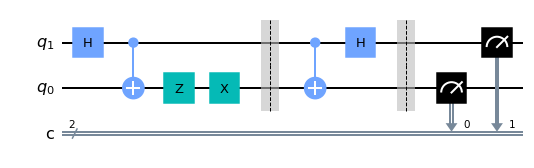

26
11 --> {'11': 10}


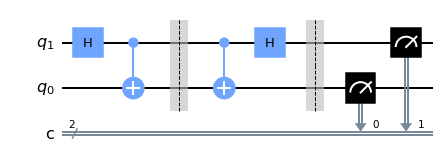

27
00 --> {'00': 10}


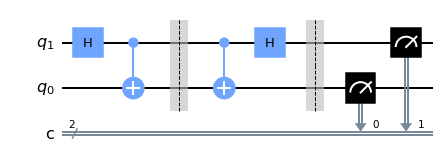

28
00 --> {'00': 10}


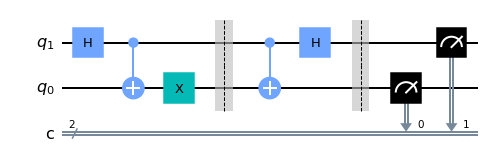

29
01 --> {'01': 10}


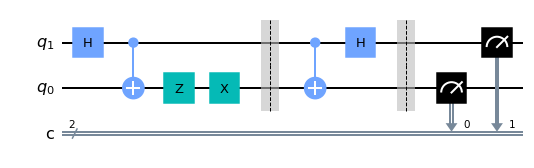

30
11 --> {'11': 10}


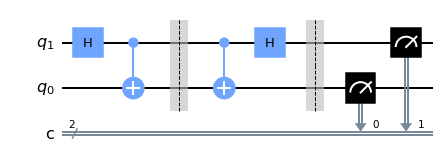

31
00 --> {'00': 10}


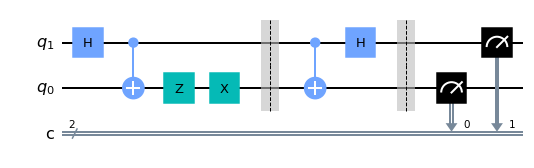

32
11 --> {'11': 10}


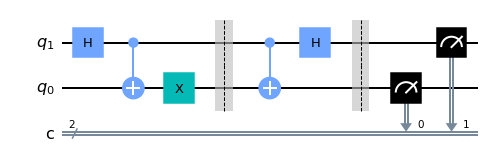

33
01 --> {'01': 10}


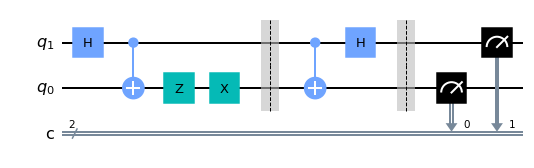

34
11 --> {'11': 10}


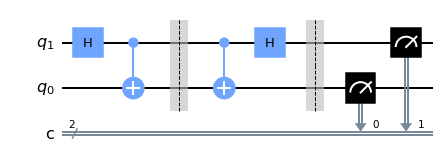

35
00 --> {'00': 10}


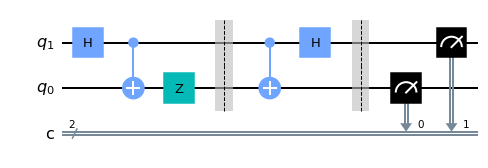

36
10 --> {'10': 10}


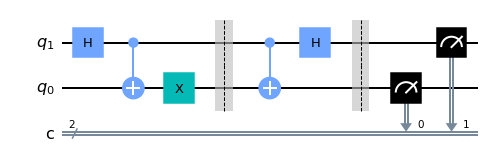

37
01 --> {'01': 10}


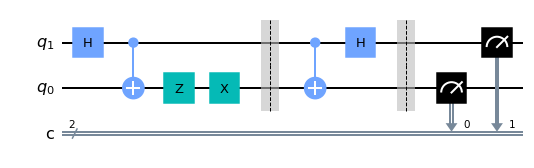

38
11 --> {'11': 10}


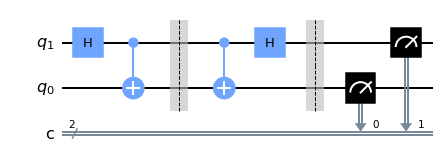

39
00 --> {'00': 10}


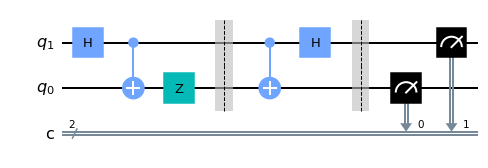

40
10 --> {'10': 10}


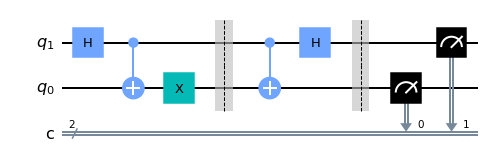

41
01 --> {'01': 10}


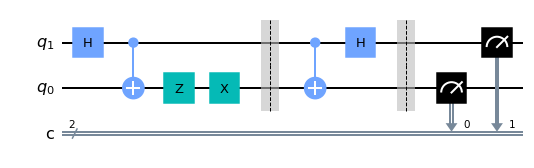

42
11 --> {'11': 10}


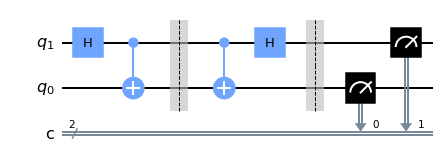

43
00 --> {'00': 10}


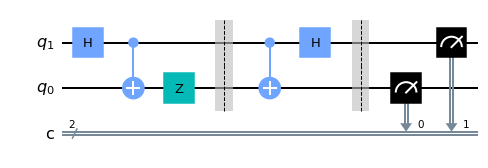

44
10 --> {'10': 10}


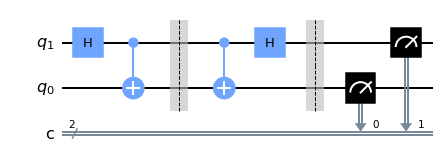

45
00 --> {'00': 10}


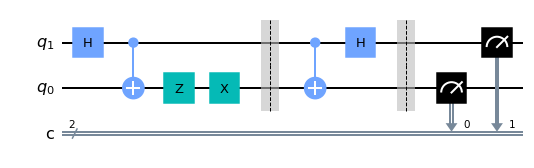

46
11 --> {'11': 10}


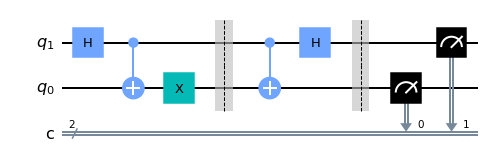

47
01 --> {'01': 10}


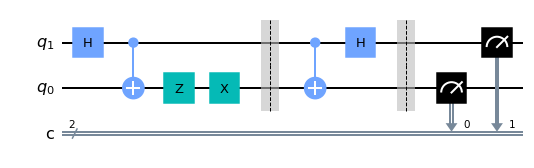

48
11 --> {'11': 10}


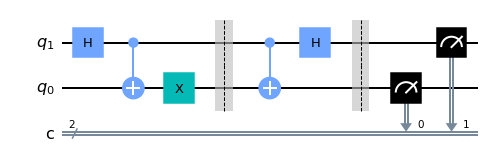

49
01 --> {'01': 10}


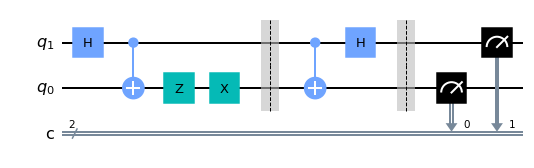

50
11 --> {'11': 10}


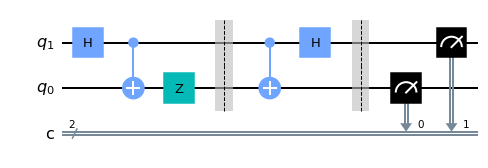

51
10 --> {'10': 10}


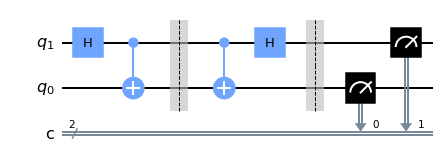

52
00 --> {'00': 10}


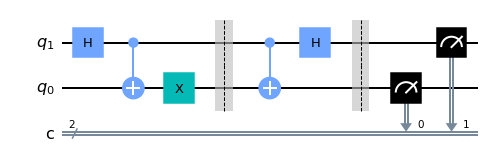

53
01 --> {'01': 10}


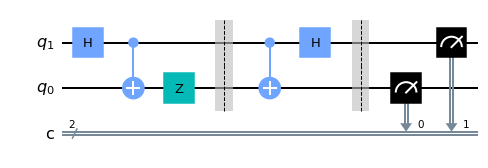

54
10 --> {'10': 10}


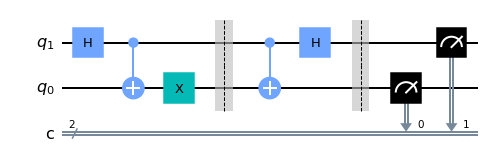

55
01 --> {'01': 10}


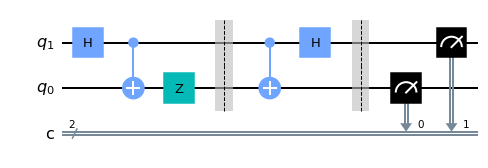

56
10 --> {'10': 10}


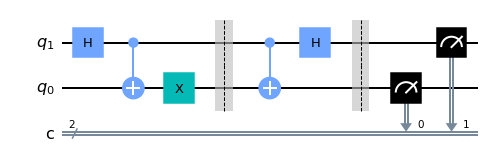

57
01 --> {'01': 10}


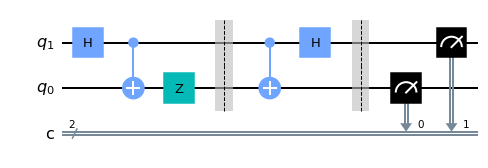

58
10 --> {'10': 10}


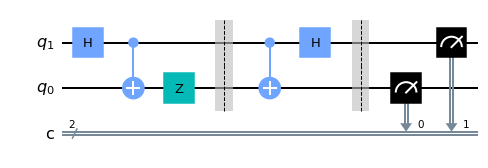

59
10 --> {'10': 10}


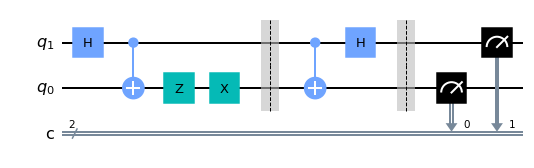

60
11 --> {'11': 10}


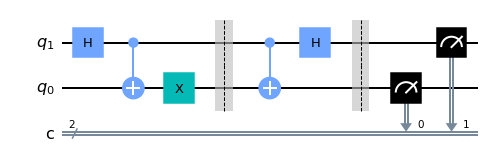

61
01 --> {'01': 10}


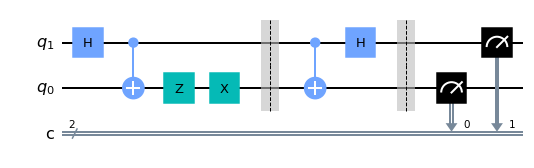

62
11 --> {'11': 10}


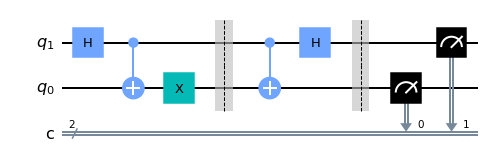

63
01 --> {'01': 10}


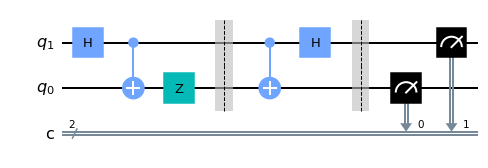

64
10 --> {'10': 10}


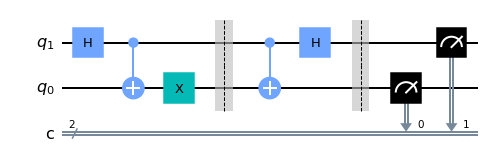

65
01 --> {'01': 10}


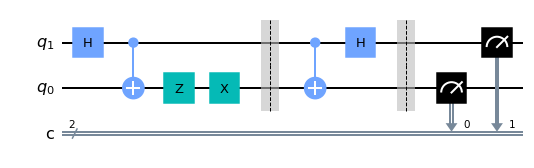

66
11 --> {'11': 10}


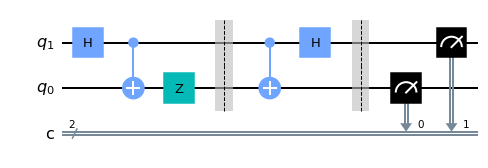

67
10 --> {'10': 10}


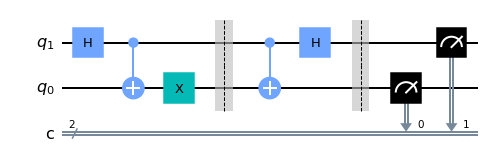

68
01 --> {'01': 10}


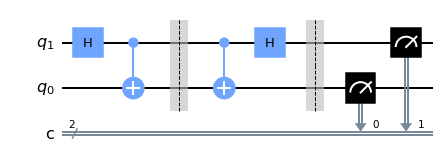

69
00 --> {'00': 10}


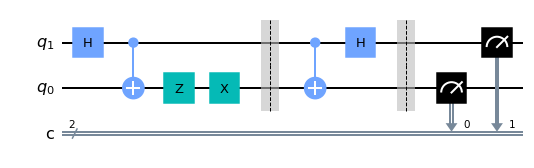

70
11 --> {'11': 10}


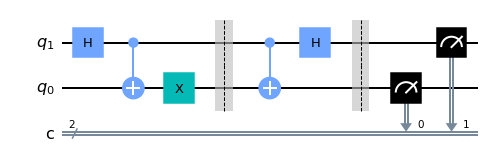

71
01 --> {'01': 10}


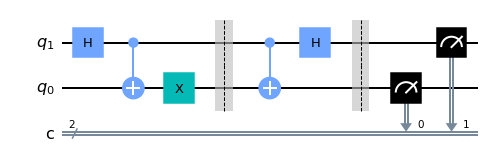

72
01 --> {'01': 10}


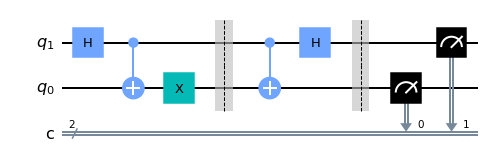

73
01 --> {'01': 10}


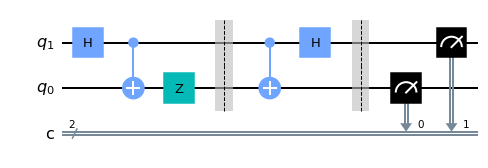

74
10 --> {'10': 10}


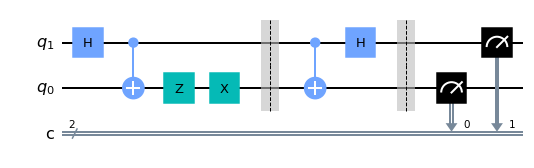

75
11 --> {'11': 10}


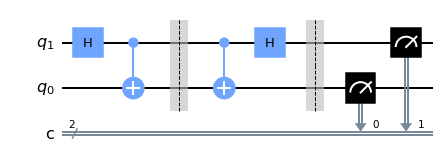

76
00 --> {'00': 10}


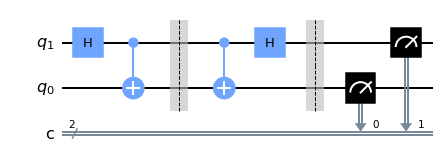

77
00 --> {'00': 10}


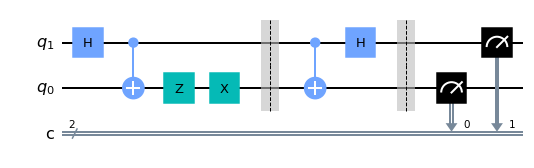

78
11 --> {'11': 10}


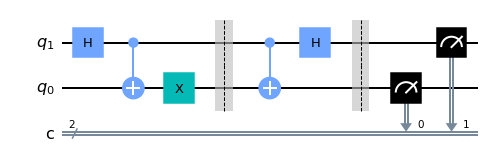

79
01 --> {'01': 10}


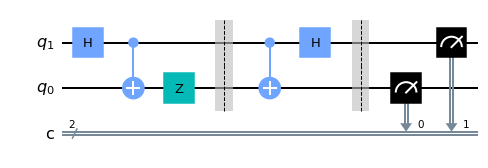

80
10 --> {'10': 10}


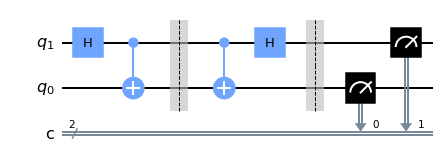

81
00 --> {'00': 10}


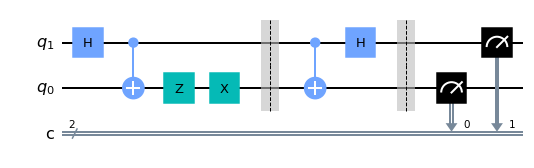

82
11 --> {'11': 10}


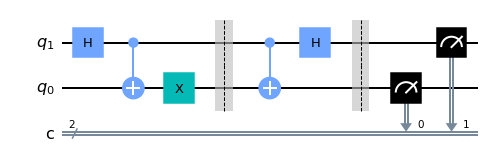

83
01 --> {'01': 10}


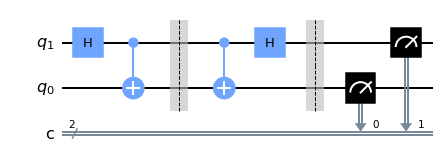

84
00 --> {'00': 10}


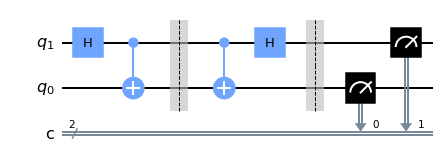

85
00 --> {'00': 10}


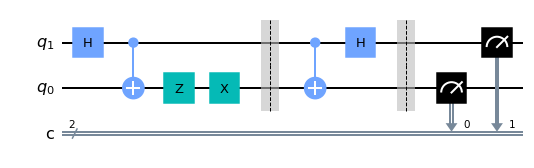

86
11 --> {'11': 10}


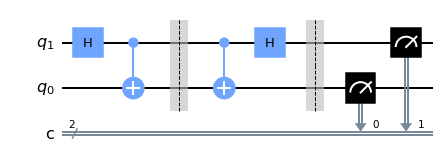

87
00 --> {'00': 10}


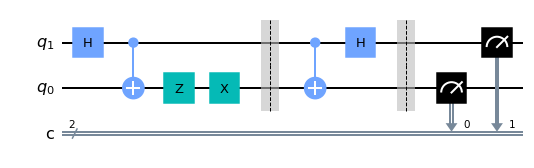

88
11 --> {'11': 10}


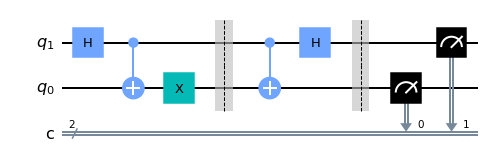

89
01 --> {'01': 10}


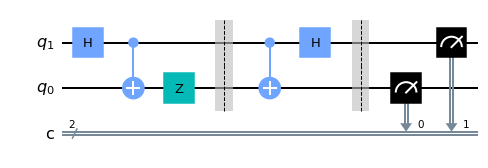

90
10 --> {'10': 10}


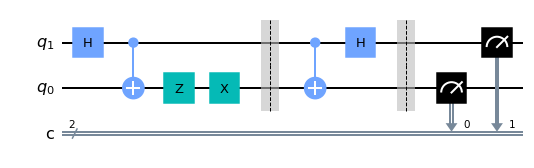

91
11 --> {'11': 10}


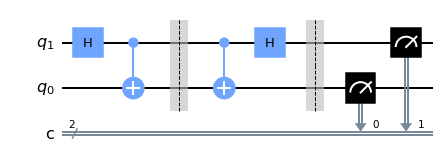

92
00 --> {'00': 10}


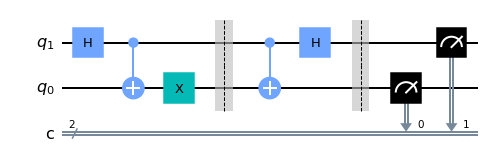

93
01 --> {'01': 10}


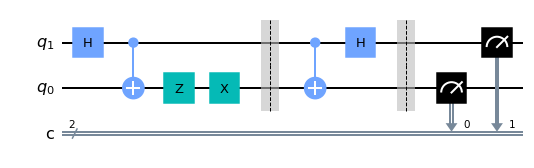

94
11 --> {'11': 10}


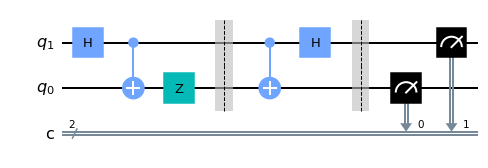

95
10 --> {'10': 10}


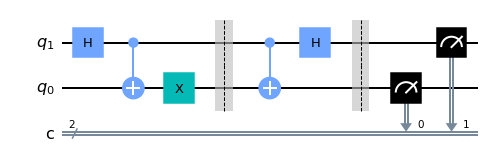

96
01 --> {'01': 10}


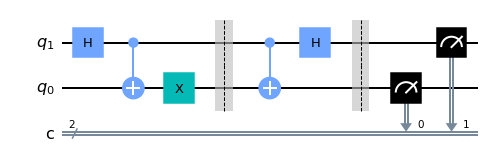

97
01 --> {'01': 10}


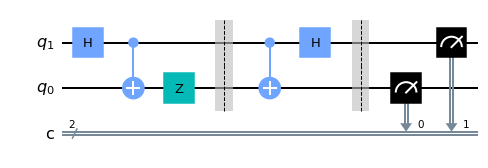

98
10 --> {'10': 10}


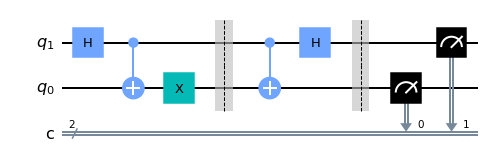

99
01 --> {'01': 10}


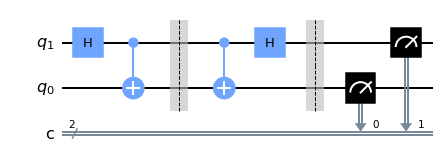

100
00 --> {'00': 10}


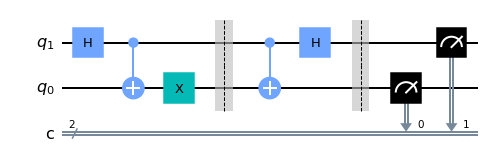

101
01 --> {'01': 10}


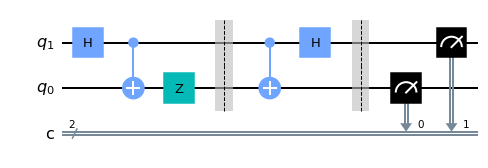

102
10 --> {'10': 10}


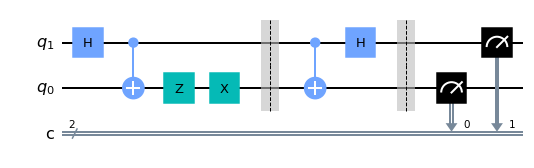

103
11 --> {'11': 10}


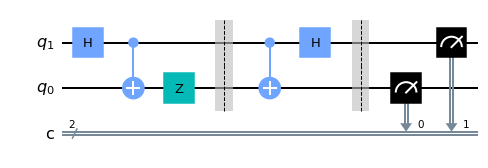

104
10 --> {'10': 10}


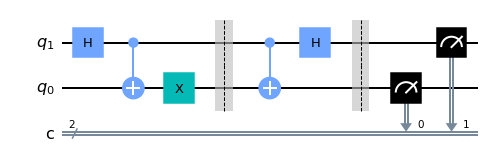

105
01 --> {'01': 10}


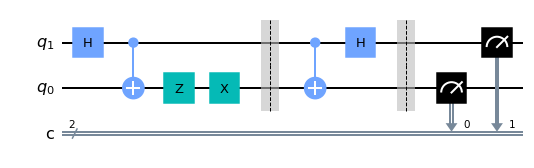

106
11 --> {'11': 10}


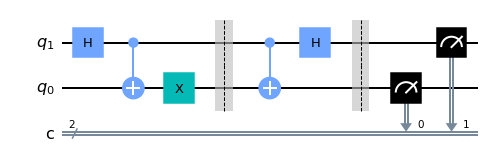

107
01 --> {'01': 10}


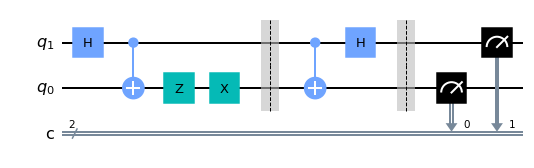

108
11 --> {'11': 10}


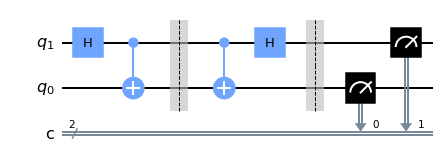

109
00 --> {'00': 10}


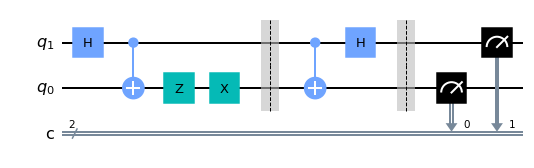

110
11 --> {'11': 10}


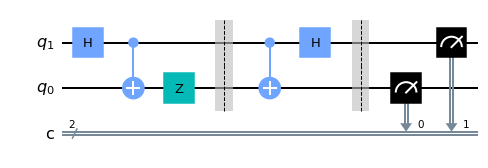

111
10 --> {'10': 10}


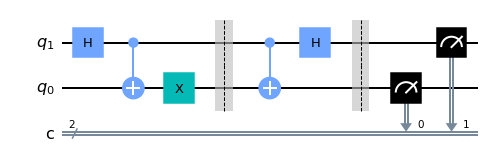

112
01 --> {'01': 10}


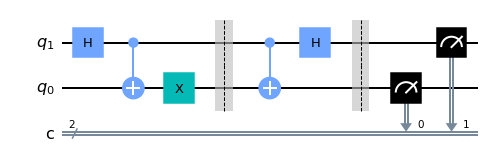

113
01 --> {'01': 10}


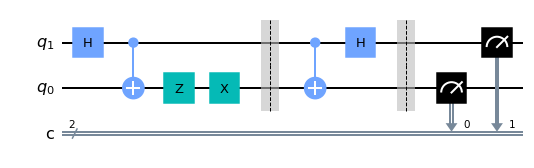

114
11 --> {'11': 10}


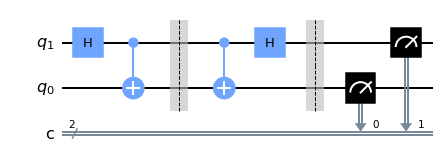

115
00 --> {'00': 10}


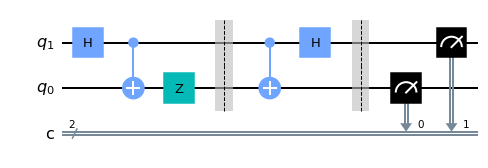

116
10 --> {'10': 10}


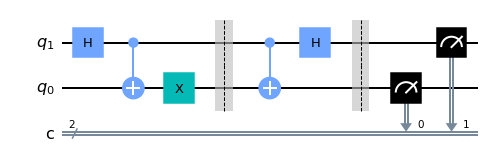

117
01 --> {'01': 10}


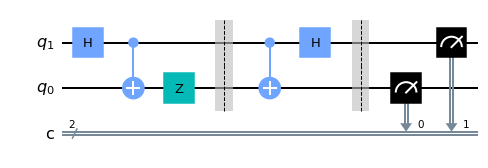

118
10 --> {'10': 10}


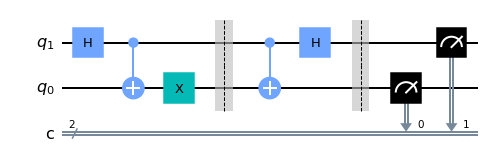

119
01 --> {'01': 10}


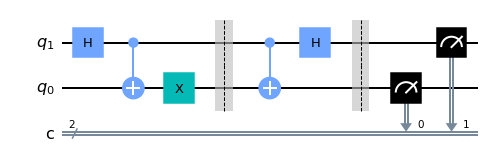

120
01 --> {'01': 10}


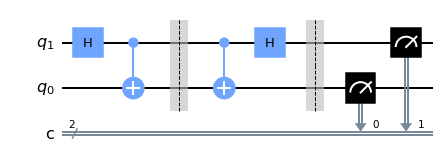

121
00 --> {'00': 10}


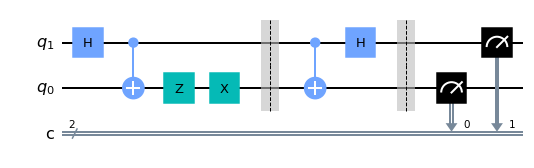

122
11 --> {'11': 10}


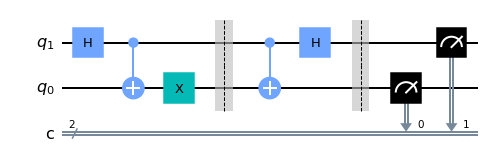

123
01 --> {'01': 10}


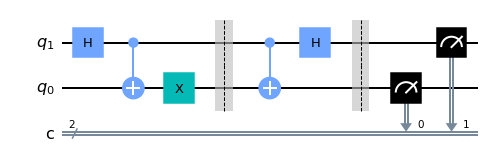

124
01 --> {'01': 10}


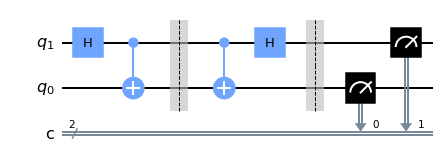

125
00 --> {'00': 10}


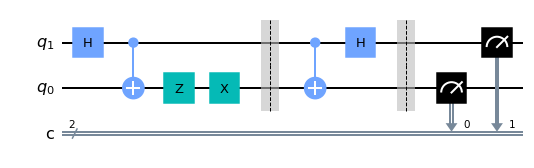

126
11 --> {'11': 10}


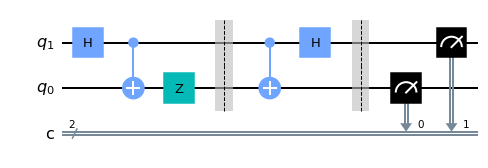

127
10 --> {'10': 10}


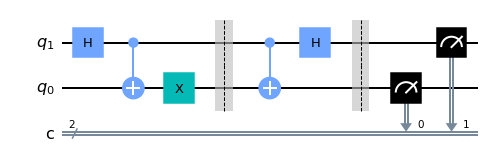

128
01 --> {'01': 10}


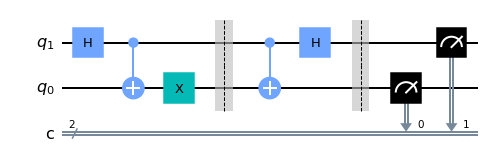

129
01 --> {'01': 10}


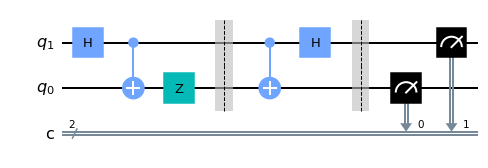

130
10 --> {'10': 10}


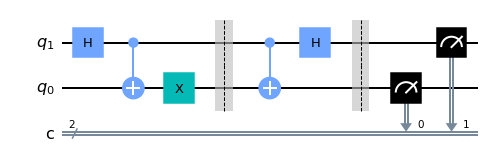

131
01 --> {'01': 10}


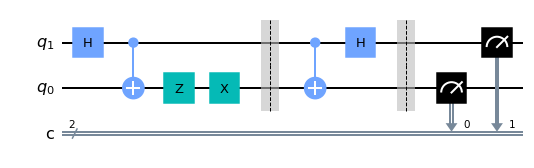

132
11 --> {'11': 10}


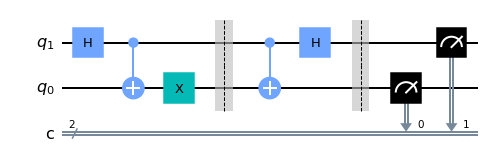

133
01 --> {'01': 10}


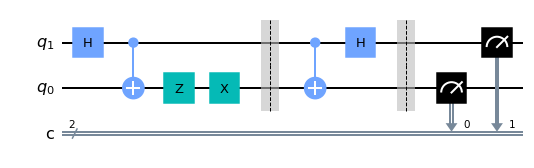

134
11 --> {'11': 10}


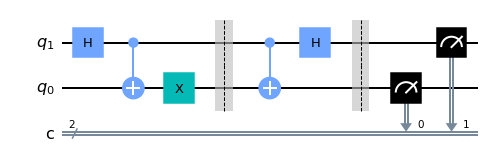

135
01 --> {'01': 10}


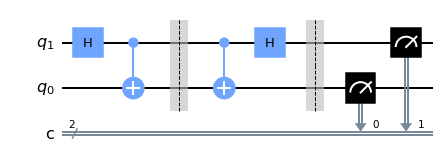

136
00 --> {'00': 10}


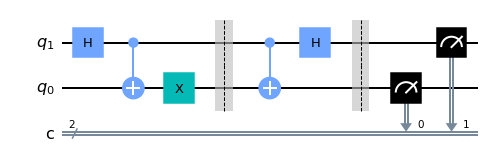

137
01 --> {'01': 10}


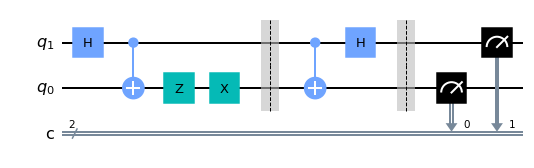

138
11 --> {'11': 10}


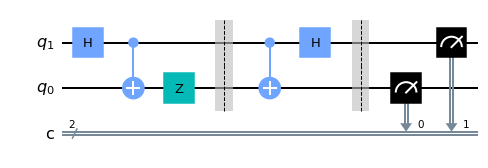

139
10 --> {'10': 10}


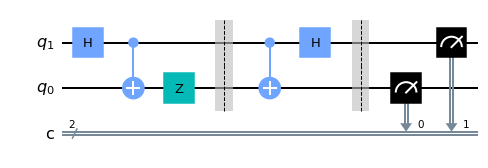

140
10 --> {'10': 10}


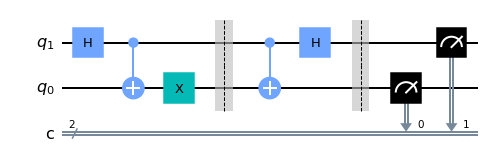

141
01 --> {'01': 10}


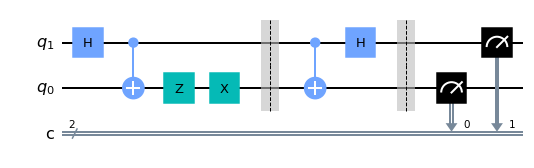

142
11 --> {'11': 10}


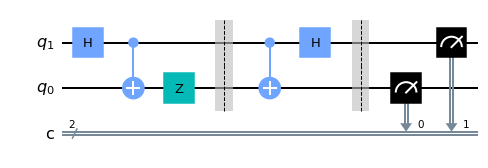

143
10 --> {'10': 10}


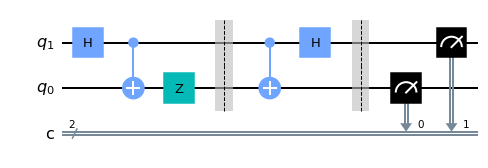

144
10 --> {'10': 10}


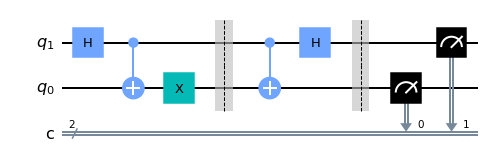

145
01 --> {'01': 10}


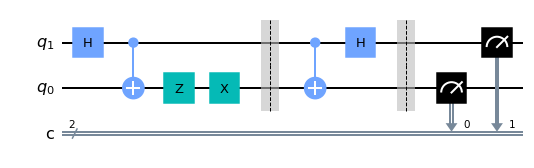

146
11 --> {'11': 10}


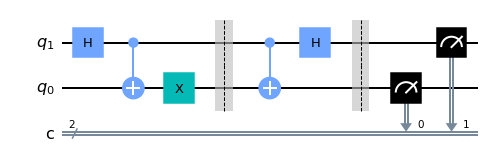

147
01 --> {'01': 10}


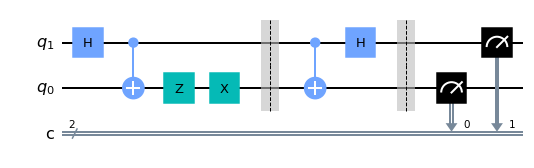

148
11 --> {'11': 10}


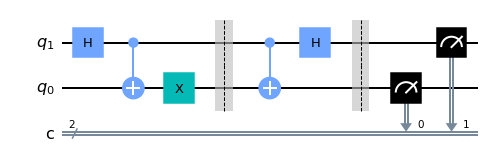

149
01 --> {'01': 10}


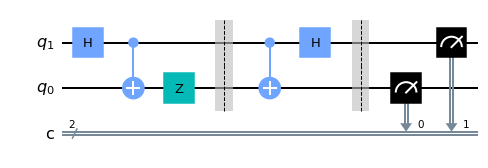

150
10 --> {'10': 10}


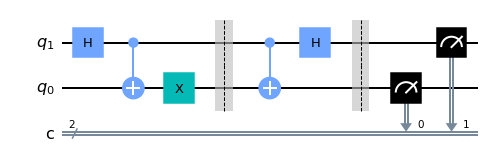

151
01 --> {'01': 10}


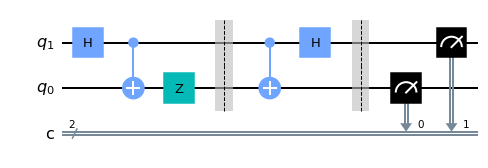

152
10 --> {'10': 10}


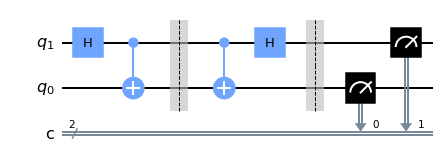

153
00 --> {'00': 10}


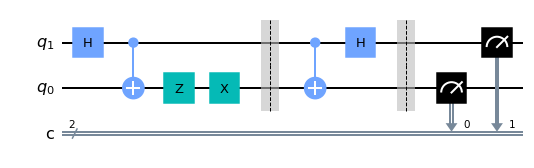

154
11 --> {'11': 10}


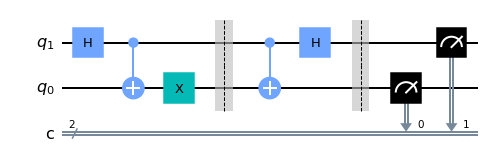

155
01 --> {'01': 10}


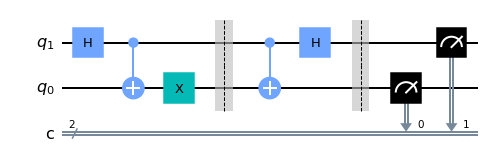

156
01 --> {'01': 10}


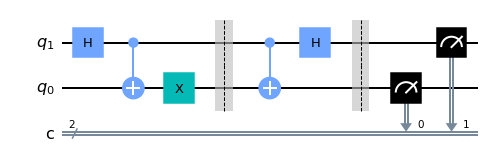

157
01 --> {'01': 10}


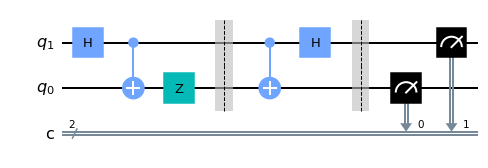

158
10 --> {'10': 10}


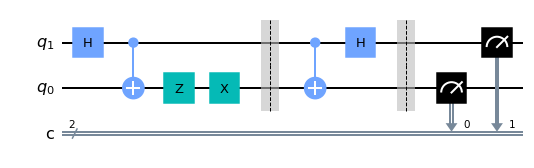

159
11 --> {'11': 10}


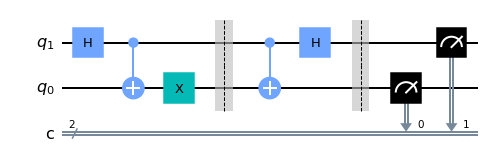

160
01 --> {'01': 10}


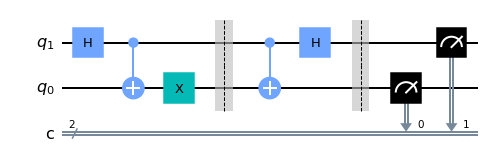

161
01 --> {'01': 10}


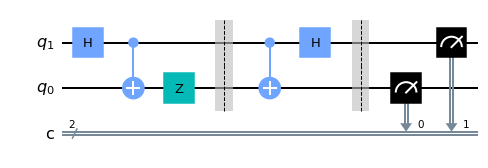

162
10 --> {'10': 10}


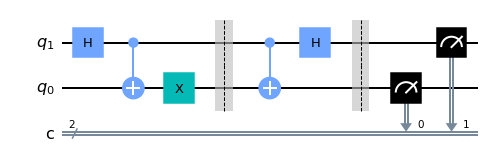

163
01 --> {'01': 10}


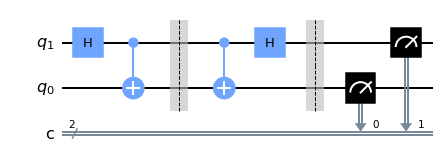

164
00 --> {'00': 10}


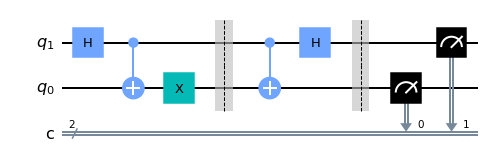

165
01 --> {'01': 10}


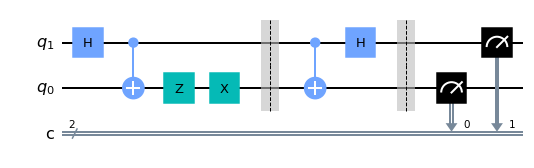

166
11 --> {'11': 10}


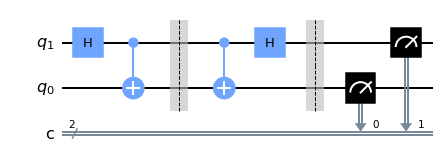

167
00 --> {'00': 10}


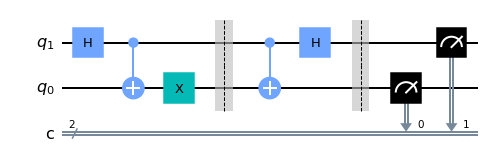

168
01 --> {'01': 10}

['01', '10', '00', '10', '01', '10', '00', '11', '00', '11', '00', '01', '01', '11', '00', '01', '01', '10', '00', '01', '01', '11', '00', '10', '00', '11', '00', '00', '01', '11', '00', '11', '01', '11', '00', '10', '01', '11', '00', '10', '01', '11', '00', '10', '00', '11', '01', '11', '01', '11', '10', '00', '01', '10', '01', '10', '01', '10', '10', '11', '01', '11', '01', '10', '01', '11', '10', '01', '00', '11', '01', '01', '01', '10', '11', '00', '00', '11', '01', '10', '00', '11', '01', '00', '00', '11', '00', '11', '01', '10', '11', '00', '01', '11', '10', '01', '01', '10', '01', '00', '01', '10', '11', '10', '01', '11', '01', '11', '00', '11', '10', '01', '01', '11', '00', '10', '01', '10', '01', '01', '00', '11', '01', '01', '00', '11', '10', '01', '01', '10', '01', '11', '01', '11', '01', '00', '01', '11', '10', '10', '01', '11', '10', '10', '01', '11', '01', '11', '01', '10', '01', '10', '00', '11', '01', '01', '01', '10', '11', '01', '01', '10', '01'

In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = dlist2

sent_bits = []

i = 1

'''
Note: The protocol will be repeated 168 times so 168 entangled qubits 
will be created and used to send our 168 bit_pairs across a quantum secure channel '''

for pair in all_pairs:

    # Sender creates a quantum circuit with two qubits: Sender's and Receiver's qubits.
    # both are initially set to |0>.
    
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # Sender applies h-gate (Hadamard) to the Sender's qubit
    qc.h(q[1])

    # Sender applies cx-gate as CNOT(Sender's qubit, Receiver's qubit)
    qc.cx(q[1],q[0])

    # Assume sender is in one country and receiver is in another. 
    # So the sender will send one entangled qubit to receiver using for example satelites -->
    # Reference: Jazmine's research paper.
    

    # Now if first bit is 1, then Sender applys z-gate to their qubit
    if pair[0]=='1': 
        qc.z(q[0])
    
    # if second bit is 1, then Sender applys x-gate (NOT) to their qubit
    if pair[1]=='1': 
        qc.x(q[0])
    
    # Sender now sends their qubit to the Receiver again using qunatum channel e.g. qunatum satellite communication
    qc.barrier()
    
    #  Receiver applies cx-gate as CNOT(Sender's qubit, Receiver's qubit)
    qc.cx(q[1],q[0])
    
    # Reciever applies h-gate (Hadamard) to the Sender's qubit
    qc.h(q[1])
    
    # Receiver measures both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draws the circuit of whatever is happening in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # extracts list of received bit pairs
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10)
    counts = job.result().get_counts(qc)
    print(i)
    print(pair,"-->",counts)
    l = list(counts.keys())
    sent_bits.append(l[0])
    i = i + 1

print()
print(sent_bits)
print()

#compare sent bit pairs (dlist2) with the received bit pairs (sent_bits)

if sent_bits == all_pairs:
    print("We have sent all our classical bits from the sender to the receiver across a quantum channel!")
else:
    print('try again :(')


<b>Stay tuned for:</b>
- Automating the entire process in an API
- Real quantum hardware implementation of this protocol
- Security capabilities of the protocol in the presence of an eavesdropper
- Better alternative QSDC protocols